In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


%matplotlib inline

RANDOM_SEED = 139

from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

ModuleNotFoundError: No module named 'jupyterthemes'

In [ ]:
def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

In [ ]:
N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

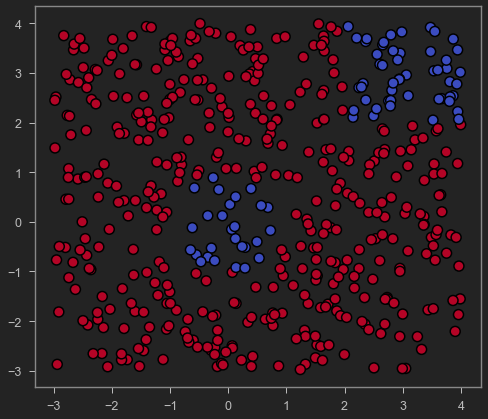

In [21]:
# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Text(0.5, 1.0, 'Deep Random Forest')

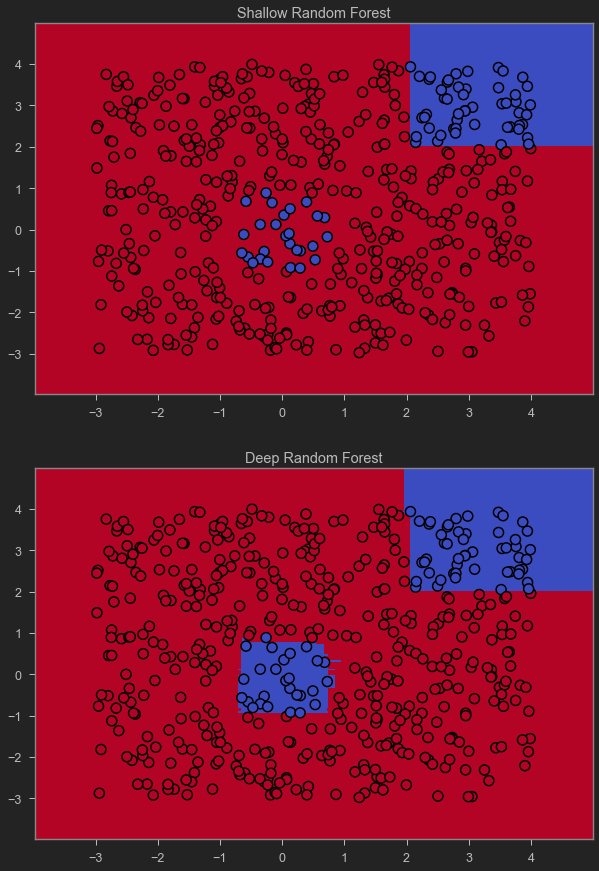

In [20]:
ig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

# Boosting. Practice

In [13]:
# df = pd.read_csv(
#     r'C:/Users/wangshu202040/Skill_Notes/Module_6_Forests/DataSets/spam7.csv')

df = pd.read_csv(
    r'spam7.csv')

In [14]:
df.sample(3)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
4327,4328,75,0.0,0.000,0.0,0.51,0.51,n
3802,3803,248,0.0,0.055,0.0,0.00,0.00,n
4305,4306,412,0.0,0.048,0.0,0.00,0.00,n


In [15]:
yesno = {'y': 1,
     'n':0}
df['spam'] = df['yesno'].map(yesno)

In [16]:
df = df.drop(['Unnamed: 0', 'yesno'],axis=1)

In [17]:
X = df.drop('spam',axis=1)
y = df['spam']

In [18]:
cols = X.columns.to_list()
for num,col_1 in enumerate(cols):          
    for col_2 in cols[num:]:
        if col_1 == col_2:
            continue
        else:            
            X[col_1+'_'+col_2] = X[col_1]*X[col_2]

In [9]:
# X['crl.tot_dollar'] = X['crl.tot'] * X['dollar']
# X['crl.tot_bang'] = X['crl.tot'] * X['bang']
# X['crl.tot_money'] = X['crl.tot'] * X['money']
# X['crl.tot_n000'] = X['crl.tot'] * X['n000']
# X['crl.tot_make'] = X['crl.tot'] * X['make']

# X['dollar_bang'] = X['dollar'] * X['bang']
# X['dollar_money'] = X['dollar'] * X['money']
# X['dollar_n000'] = X['dollar'] * X['n000']
# X['dollar_make'] = X['dollar'] * X['make']

# X['bang_money'] = X['bang'] * X['money']
# X['bang_n000'] = X['bang'] * X['n000']
# X['bang_make'] = X['bang'] * X['make']

# X['money_n000'] = X['money'] * X['n000']
# X['money_make'] = X['money'] * X['make']

# X['n000_make'] = X['n000'] * X['make']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=42)

In [9]:
gb_clf = GradientBoostingClassifier(learning_rate=.1,
                                   n_estimators=100,
                                   max_depth=3,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                    subsample=1,
                                   max_features=None,
                                   random_state=42,)

In [10]:
# 1
gb_clf.fit(X_train, y_train)
accuracy_score(y_test,gb_clf.predict(X_test))

0.8653637350705755

<AxesSubplot:>

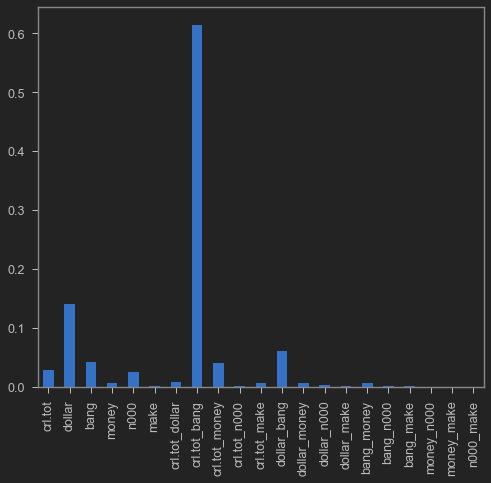

In [11]:
#2
pd.Series(gb_clf.feature_importances_, index=X.columns).plot.bar()

In [13]:
# 4
gb_clf1=GradientBoostingClassifier(random_state=42,)
param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
}

clf_gb1 = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    refit=True
)

In [14]:
clf_gb1.fit(X_train, y_train)
# accuracy_score(y_test,clf_gb1.predict(X_test))

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [15]:
clf_gb1.best_score_

0.8836956521739131

## Задание 6.4.3

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании GridSearchCV перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

In [17]:
clf_gb1.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

In [22]:
gb_clf1 = GradientBoostingClassifier(random_state=42,)
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [1250],
    'max_depth': list(range(1,16,1))
}

clf_gb1 = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    refit=True
)

In [23]:
clf_gb1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'n_estimators': [1250]},
             scoring='accuracy')

In [24]:
clf_gb1.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1250}

## Задание 6.4.4


Может показаться, что, научившись запускать готовые фукнции из библиотек и настраивать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — legacy code, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать code review (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации AdaBoost с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр learning_rate возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

In [19]:
def AdaBoost_scratch(X, y, M=10, learning_rate=1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [], [], [], []
    
    # инициализация весов
    sample_weight = np.ones(N)/N
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    
    for m in range(M):
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2)
        estimator.fit(X,y,sample_weight=sample_weight)
        y_predict = estimator.predict(X)
        
        # Маска для ошибок классификации
        incorrect = (y_predict != y)  
        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight*incorrect)
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1-estimator_error)/estimator_error)
        #Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect *((sample_weight>0) | (estimator_weight<0))) 
        
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    
        # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

In [20]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363
